In [20]:
import numpy as np
from ngsolve.webgui import Draw
from pinnfem import (
    Circ,
    Cuboid,
    Cylinder,
    Rect,
    Sphere,
    exclude_points_in_region,
    get_vals_of_points,
    plot_geo,
    plot_test_points,
    solve,
    wrap_to_mesh,
)

# Poisson

## 2D

Sources: [[1]](https://fenicsproject.org/pub/tutorial/html/._ftut1004.html), [[2]](https://docu.ngsolve.org/v6.2.2302/i-tutorials/wta/poisson.html)

Got a list of 3 geometries.


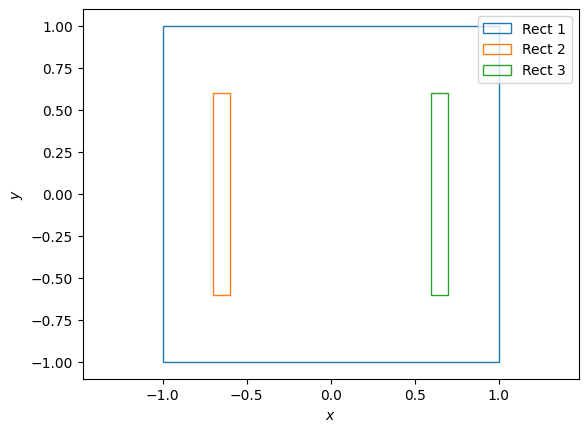

In [21]:
solve_BC = {
    "bc": "default",
    "mat": "air",
    "mat_perm": 1,
    "pot_val": 0,
}
Ω = Rect(-1, -1, 2, 2, BC=solve_BC)

solve_BC = {"bc": "bc_plate1", "mat": "el_mat", "mat_perm": 5.0, "pot_val": 10}
# plate1 = Circ(0.5, 0.5, 0.1, BC=solve_BC)
plate1 = Rect(-0.7, -0.6, 0.1, 1.2, BC=solve_BC)

solve_BC = {"bc": "bc_plate2", "mat": "el_mat", "mat_perm": 5.0, "pot_val": -10}
# plate2 = Circ(-0.5, -0.5, 0.2, BC=solve_BC)
plate2 = Rect(0.6, -0.6, 0.1, 1.2, BC=solve_BC)

# solve_BC = {"bc": "bc_plate3", "mat": "el_mat", "mat_perm": 2.0, "pot_val": 15}
# plate3 = Rect(-0.5, 0.5, 0.4, 0.2, BC=solve_BC)

plot_geo([Ω, plate1, plate2])  # plate3

In [22]:
refinement = 0.05
mesh = wrap_to_mesh(Ω, [plate1, plate2], refinement)  # plate3

In [23]:
Draw(mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [24]:
# solve and get grid function
gfu = solve(Ω, [plate1, plate2], refinement)  # plate3

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

In [25]:
X, Y, Pts = Ω.generate_grid()
Pts = exclude_points_in_region(Pts, [plate1, plate2])  # plate3

xs, ys, vals = get_vals_of_points(mesh, gfu, Pts)

Got a list of 2 geometries to exclude.


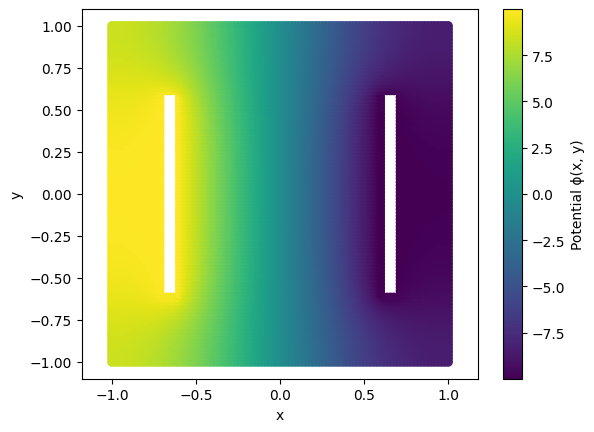

In [26]:
plot_test_points(xs, ys, vals)

## 3D Poisson

### Cuboids

Got a list of 3 geometries.


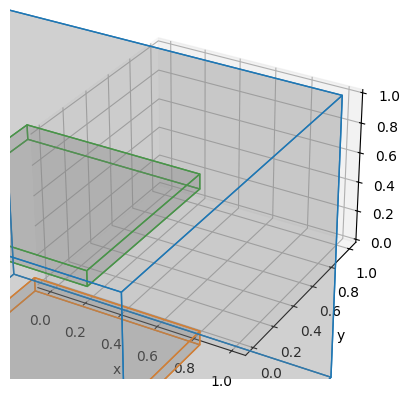

In [27]:
bc_box = {
    "bc": "default",
    "mat": "air",
    "mat_perm": 1,
    "pot_val": 0,
}
box = Cuboid(-1, -1, -1, 2, 2, 2, BC=bc_box)

bc_plus = {"bc": "bc_plus", "mat": "el_mat", "mat_perm": 5.0, "pot_val": 5}
# plate_plus = Cuboid(-0.5,-0.5,-0.5,0.2,1,1, BC=bc_plus)
plate_plus = Cuboid(-0.5, -0.5, -0.6, 1, 1, 0.1, BC=bc_plus)

bc_minus = {"bc": "bc_minus", "mat": "el_mat", "mat_perm": 5.0, "pot_val": -5}
# plate_minus = Cuboid(0.5,-0.5,-0.5,0.2,1,1,BC=bc_minus)
plate_minus = Cuboid(-0.5, -0.5, 0.5, 1, 1, 0.1, BC=bc_minus)

plot_geo([box, plate_plus, plate_minus])

In [28]:
refinement = 0.5
mesh = wrap_to_mesh(box, [plate_minus, plate_plus], refinement)

In [29]:
Draw(mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [30]:
# solve and get grid function
gfu = solve(box, [plate_minus, plate_plus], refinement)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

### Spheres

Got a list of 3 geometries.


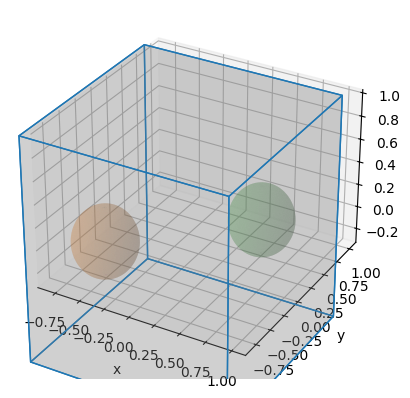

In [31]:
bc_box = {
    "bc": "default",
    "mat": "air",
    "mat_perm": 1,
    "pot_val": 0,
}
box = Cuboid(-1, -1, -1, 2, 2, 2, BC=bc_box)

bc_plus = {"bc": "bc_plus", "mat": "el_mat", "mat_perm": 5.0, "pot_val": 5}
ball_plus = Sphere(-0.5, -0.5, 0, 0.3, BC=bc_plus)

bc_minus = {"bc": "bc_minus", "mat": "el_mat", "mat_perm": 5.0, "pot_val": -5}
ball_minus = Sphere(0.5, 0.5, 0, 0.3, BC=bc_minus)

plot_geo([box, ball_plus, ball_minus])

In [32]:
refinement = 0.5
mesh = wrap_to_mesh(box, [ball_plus, ball_minus], refinement)

In [33]:
Draw(mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [34]:
# solve and get grid function
gfu = solve(box, [ball_minus, ball_plus], refinement)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

### Cylinders

Got a list of 3 geometries.


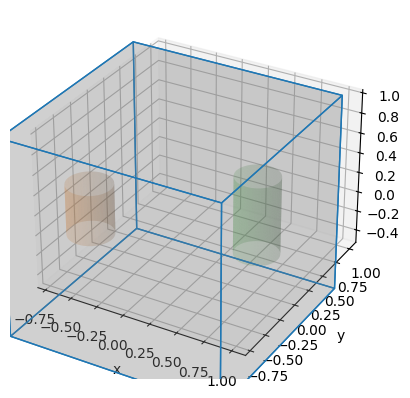

In [16]:
bc_box = {
    "bc": "default",
    "mat": "air",
    "mat_perm": 1,
    "pot_val": 0,
}
box = Cuboid(-1, -1, -1, 2, 2, 2, BC=bc_box)

bc_plus = {"bc": "bc_plus", "mat": "el_mat", "mat_perm": 5.0, "pot_val": 5}
zyl_plus = Cylinder(-0.5, -0.5, 0.2, 0.2, 0.5, BC=bc_plus)

bc_minus = {"bc": "bc_minus", "mat": "el_mat", "mat_perm": 5.0, "pot_val": -5}
zyl_minus = Cylinder(0.5, 0.5, -0.1, 0.2, 0.8, BC=bc_minus)

plot_geo([box, zyl_plus, zyl_minus])

In [17]:
refinement = 0.5
mesh = wrap_to_mesh(box, [zyl_plus, zyl_minus], refinement)

In [18]:
Draw(mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [19]:
# solve and get grid function
gfu = solve(box, [zyl_minus, zyl_plus], refinement)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…